# [Python 股票分析教學 ：Stocker 強大的股價預測分析工具 (附完整程式碼)](https://weikaiwei.com/python/stocker/ )

## 都會阿嬤 https://weikaiwei.com

# 第零部份 安裝相關套件

In [1]:
!pip install -U quandl numpy pandas matplotlib pystan pytrends plotly

Requirement already up-to-date: quandl in /home/leonardo/anaconda3/envs/stock/lib/python3.7/site-packages (3.5.0)
Requirement already up-to-date: numpy in /home/leonardo/anaconda3/envs/stock/lib/python3.7/site-packages (1.18.1)
Requirement already up-to-date: pandas in /home/leonardo/anaconda3/envs/stock/lib/python3.7/site-packages (1.0.1)
Requirement already up-to-date: matplotlib in /home/leonardo/anaconda3/envs/stock/lib/python3.7/site-packages (3.1.3)
Requirement already up-to-date: pystan in /home/leonardo/anaconda3/envs/stock/lib/python3.7/site-packages (2.19.1.1)
Requirement already up-to-date: pytrends in /home/leonardo/anaconda3/envs/stock/lib/python3.7/site-packages (4.7.2)
Requirement already up-to-date: plotly in /home/leonardo/anaconda3/envs/stock/lib/python3.7/site-packages (4.5.2)


In [2]:
!conda install -c conda-forge fbprophet

Solving environment: done

# All requested packages already installed.



# 第一部份 讀取資料（Local, 下載自臺灣證券交易所）

In [3]:
import pandas as pd
import os

stockNo = "0050"
data_dir = "stock_data"


stock_dir = os.path.join(data_dir, stockNo)
files = os.listdir(stock_dir)
df = pd.DataFrame()

def date_transform(date):
    [y, M, d] = date.split("/")
    return "{}-{}-{}".format(str(int(y) + 1911), M, d)

for file in files:
    file_path = os.path.join(stock_dir, file)
    temp_df = pd.read_csv(file_path)
    temp_df['日期'] = temp_df['日期'].apply(date_transform)
    df = pd.concat([df, temp_df])
    
df = df.rename(columns={"日期":"Date", 
                        "成交股數":"Volume" ,
                        "成交金額":"Turnover", 
                        "開盤價":"Open", 
                        "最高價":"High", 
                        "最低價":"Low", 
                        "收盤價":"Close", 
                        "漲跌價差":"Change",
                        "成交筆數":"Transaction"
                        })      

df['Date']= pd.to_datetime(df['Date']) 
df = df.sort_values(by='Date')
df = df.reset_index(drop=True)
df.head()

,Date,Volume,Turnover,Open,High,Low,Close,Change,Transaction
0,2018-01-02,3613199,298033251,82.15,82.60,82.15,82.60,+0.45,1795
1,2018-01-03,7196437,599476413,82.95,83.45,82.95,83.35,+0.75,3014
2,2018-01-04,5627565,469312820,83.50,83.65,83.20,83.50,+0.15,2278
3,2018-01-05,7616796,636768692,83.50,83.80,83.30,83.75,+0.25,2562
4,2018-01-08,5189611,435775639,83.80,84.15,83.70,84.10,+0.35,2282


# 第二部份 使用 Stocker 預測股價

In [4]:
from stocker import Stocker
stock = Stocker(stockNo, df)

stockNo : 0050 Stocker Initialized. Data covers 2018-01-02 00:00:00 to 2020-02-27 00:00:00.


## 畫出歷史股價

Maximum Adj. Close = 98.60 on 2020-01-14 00:00:00.
Minimum Adj. Close = 72.20 on 2019-01-04 00:00:00.
Current Adj. Close = 88.65 on 2020-02-27 00:00:00.



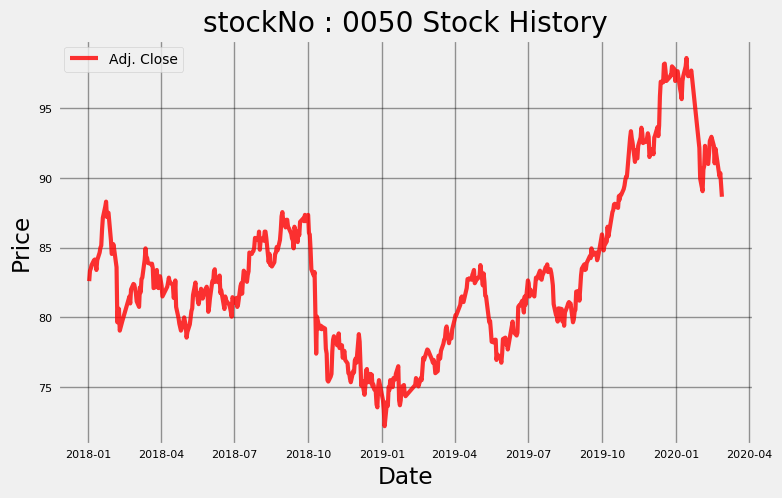

In [5]:
stock.plot_stock()

## 使用 Prophet 預言家模型預測股價

Predicted Price on 2020-03-08 00:00:00 = $91.59


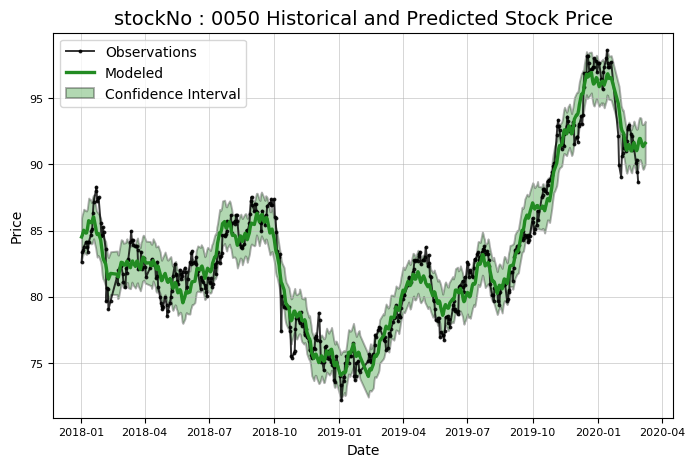

In [6]:
model, model_data = stock.create_prophet_model(days=10)


Prediction Range: 2019-02-27 00:00:00 to 2020-02-27 00:00:00.

Predicted price on 2020-02-26 00:00:00 = $97.06.
Actual price on    2020-02-26 00:00:00 = $89.45.

Average Absolute Error on Training Data = $0.74.
Average Absolute Error on Testing  Data = $7.87.

When the model predicted an increase, the price increased 50.69% of the time.
When the model predicted a  decrease, the price decreased  39.18% of the time.

The actual value was within the 80% confidence interval 36.78% of the time.


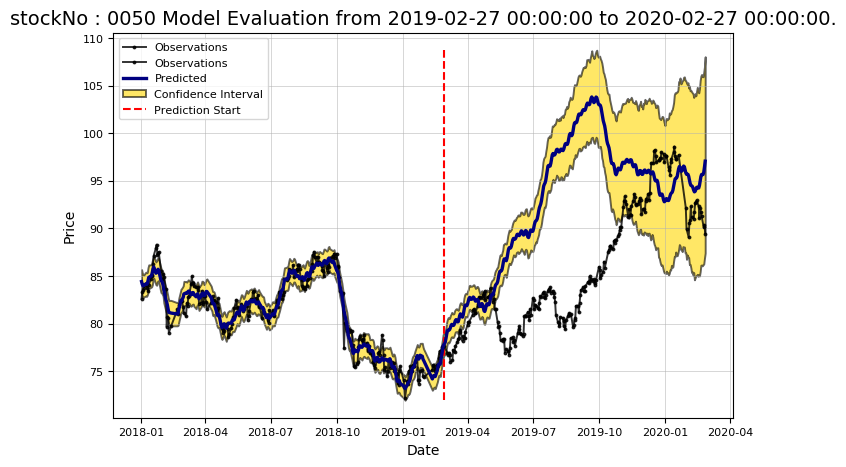

In [7]:
stock.evaluate_prediction()

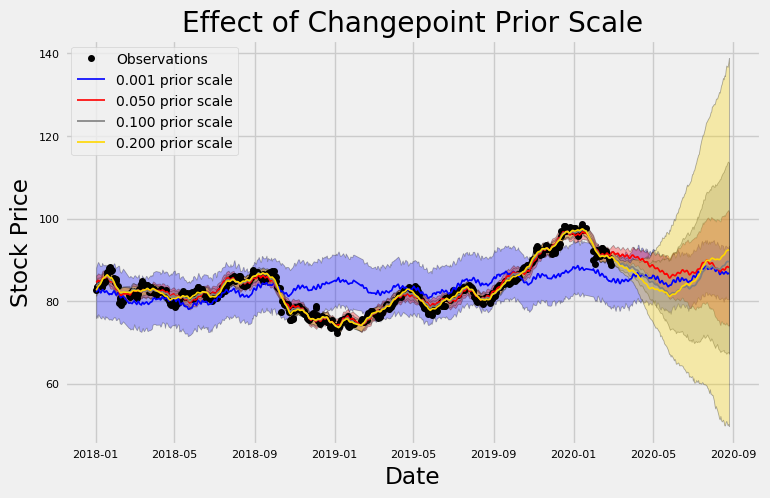

In [8]:
stock.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])

In [9]:
stock.changepoint_prior_scale = 0.5


Prediction Range: 2019-02-27 00:00:00 to 2020-02-27 00:00:00.

Predicted price on 2020-02-26 00:00:00 = $63.57.
Actual price on    2020-02-26 00:00:00 = $89.45.

Average Absolute Error on Training Data = $0.57.
Average Absolute Error on Testing  Data = $13.54.

When the model predicted an increase, the price increased 50.98% of the time.
When the model predicted a  decrease, the price decreased  41.01% of the time.

The actual value was within the 80% confidence interval 97.52% of the time.


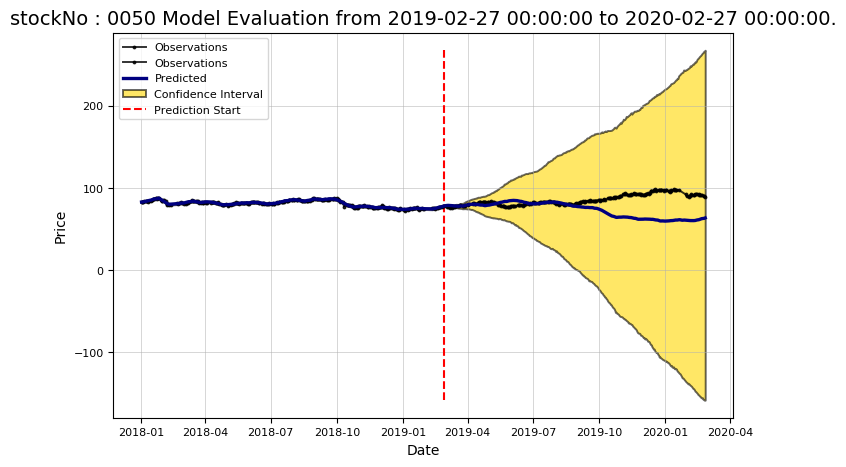

In [10]:
stock.evaluate_prediction()